## Description:

The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Import libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,3)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier


In [2]:
#Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#finding Null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking the duplicated record
df.duplicated().sum()

0

In [7]:
#finding 0 values
for col in df.columns:
    min_val = df[col].min()
    print(f'Minimum value in {col} : {min_val}')

Minimum value in Pregnancies : 0
Minimum value in Glucose : 0
Minimum value in BloodPressure : 0
Minimum value in SkinThickness : 0
Minimum value in Insulin : 0
Minimum value in BMI : 0.0
Minimum value in DiabetesPedigreeFunction : 0.078
Minimum value in Age : 21
Minimum value in Outcome : 0


* Observations:

1.There are a total of 768 records and 9 features in the dataset.

2.Each feature can be either of integer or float dataype.

3.Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.

4.There are zero NaN values in the dataset.

5.In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

* Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

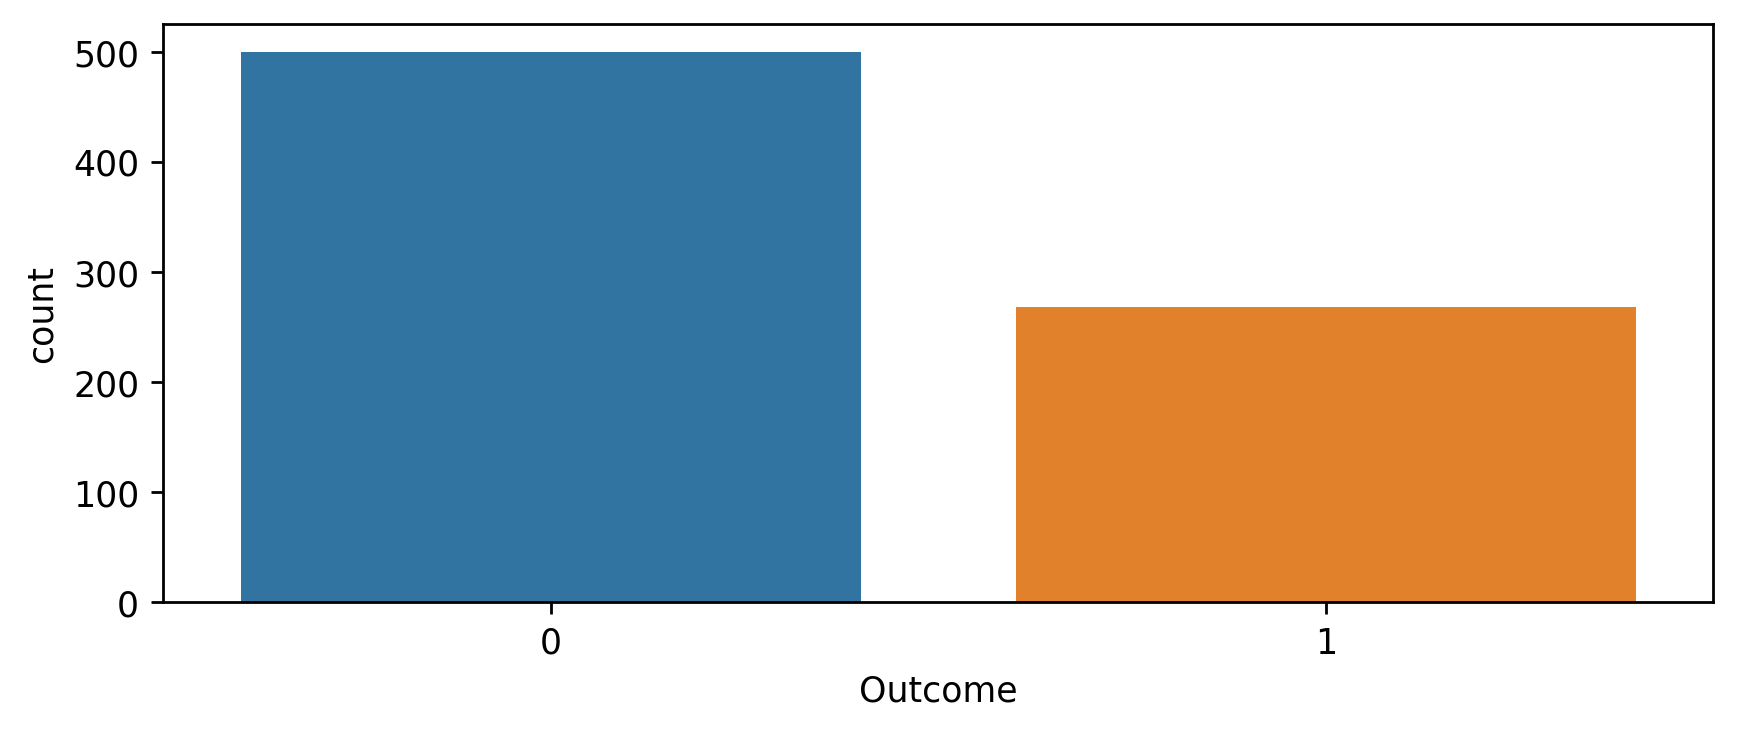

In [8]:
sns.countplot(x = 'Outcome',data = df)

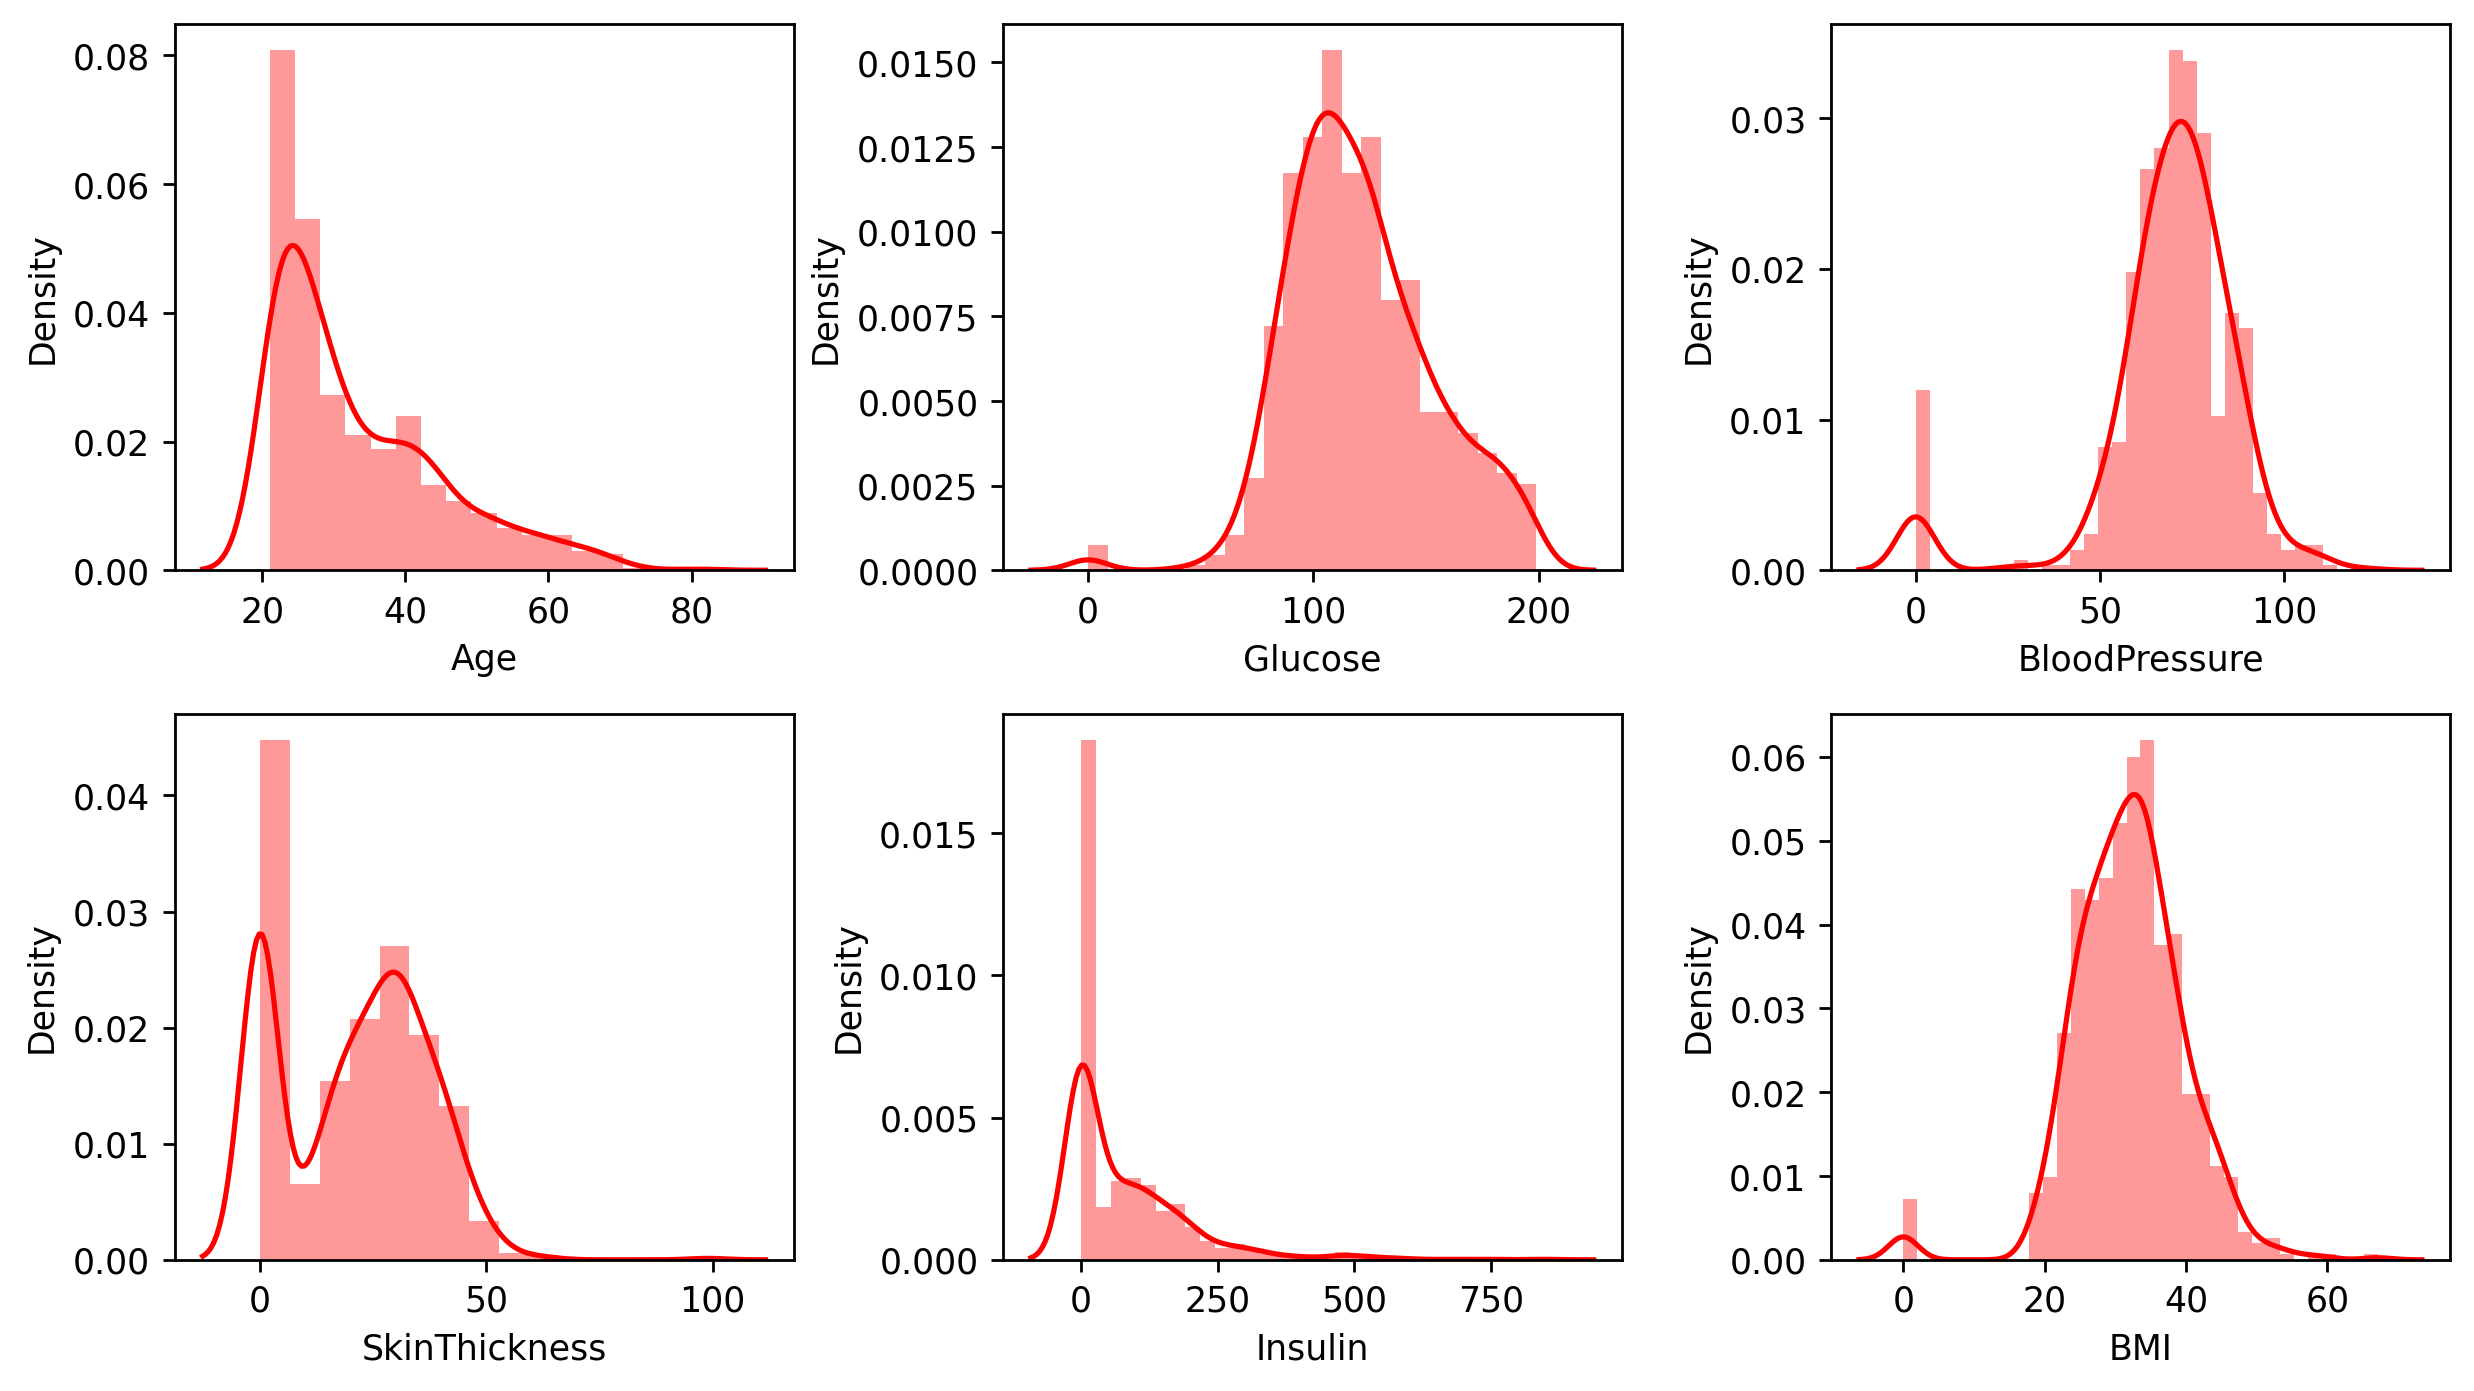

In [9]:
plt.rcParams['figure.figsize'] = (10,8)
plt.subplot(3,3,1)
sns.distplot(df['Age'], color = 'red', kde = True)

plt.subplot(3,3,2)
sns.distplot(df['Glucose'], color = 'red', kde = True)

plt.subplot(3,3,3)
sns.distplot(df['BloodPressure'], color = 'red', kde = True)

plt.subplot(3,3,4)
sns.distplot(df['SkinThickness'], color = 'red', kde = True)

plt.subplot(3,3,5)
sns.distplot(df['Insulin'], color = 'red', kde = True)

plt.subplot(3,3,6)
sns.distplot(df['BMI'], color = 'red', kde = True)

plt.tight_layout()
plt.rcParams['figure.figsize'] = (10,8)

<Axes: >

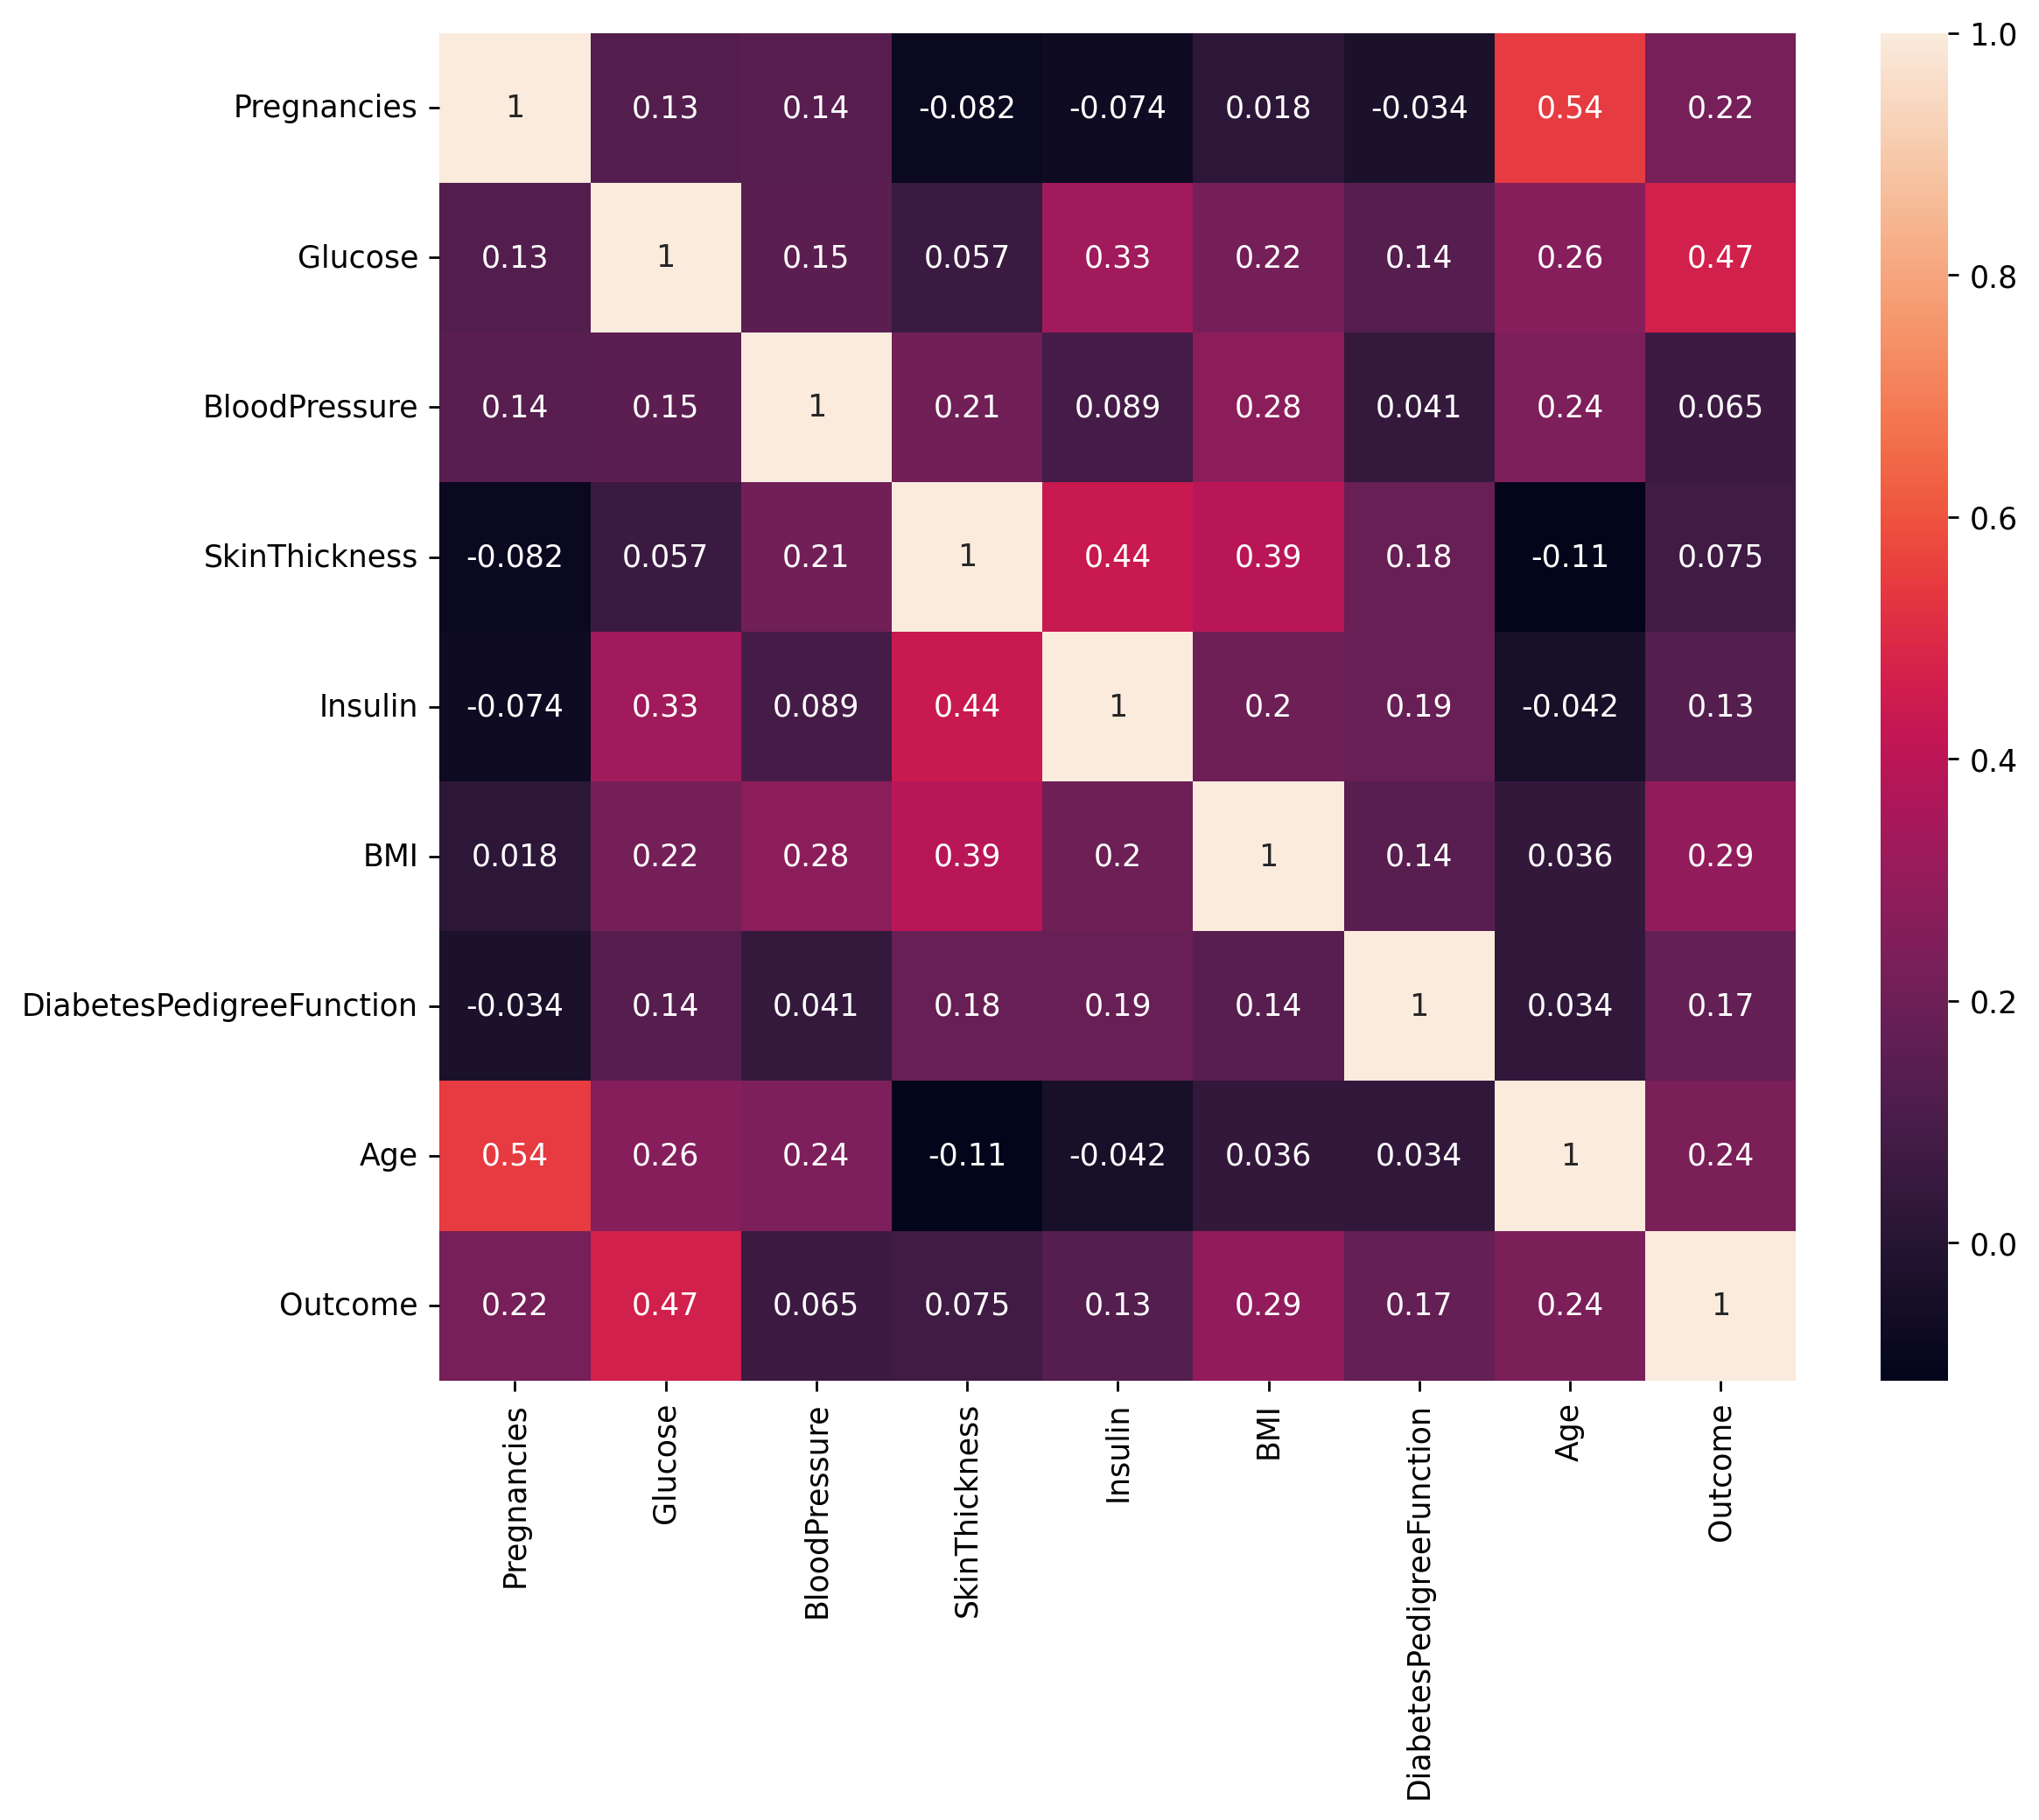

In [10]:
sns.heatmap(df.corr(), annot = True)

* Observations:

1.The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.

2.From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

## Data Preprocessing

In [11]:
# Converting 0 values to NA values
col_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df[col_with_zero] = df[col_with_zero].replace(0,np.nan)

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# Replacing the Null value with mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [13]:
# Replacing the null value with median
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:

for col in df.columns:
    min_val = df[col].min()
    print(f'Minimum value in {col} : {min_val}')

Minimum value in Pregnancies : 0
Minimum value in Glucose : 44.0
Minimum value in BloodPressure : 24.0
Minimum value in SkinThickness : 7.0
Minimum value in Insulin : 14.0
Minimum value in BMI : 18.2
Minimum value in DiabetesPedigreeFunction : 0.078
Minimum value in Age : 21
Minimum value in Outcome : 0


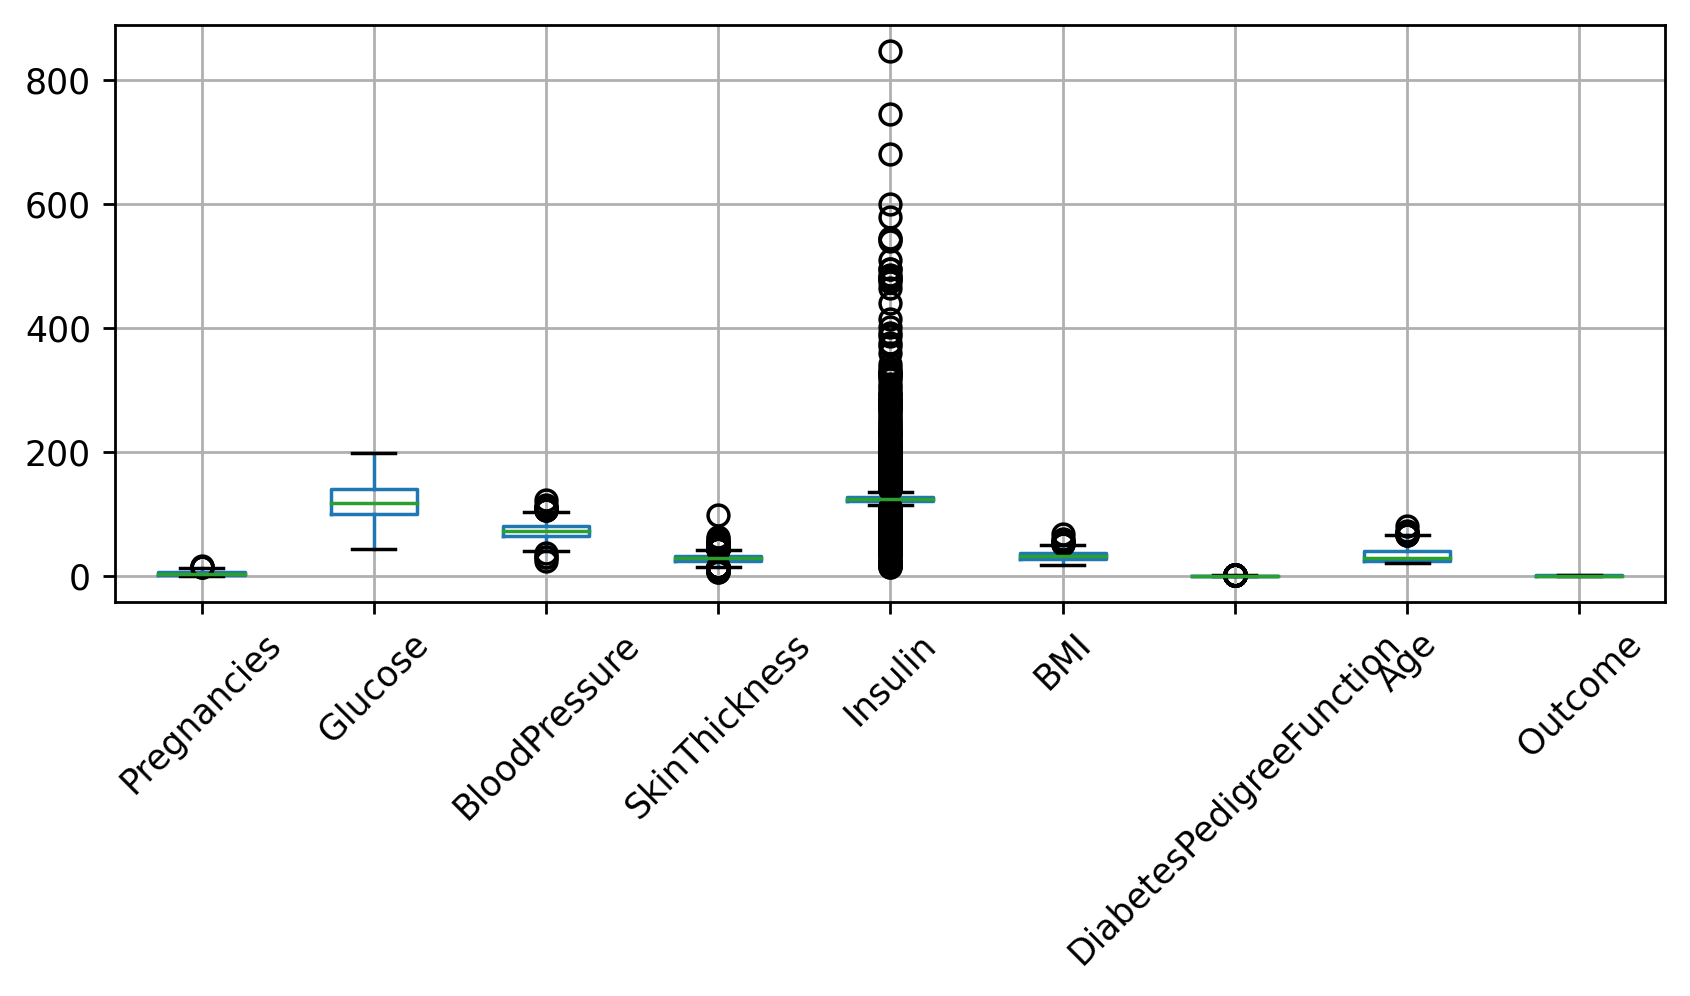

In [17]:

plt.rcParams['figure.figsize'] = (8,3)

df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [18]:
# Deciding the Independent feature and Target Feature
x = df.iloc[:,:-1]
y = df['Outcome']

In [19]:
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)

In [21]:
x

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [22]:
# Splititng the data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state =53)

In [23]:
# Checking dimensions
print("X_train shape:", xtrain.shape)
print("X_test shape:", xtest.shape)
print("Y_train shape:", ytrain.shape)
print("Y_test shape:", ytest.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
Y_train shape: (614,)
Y_test shape: (154,)


## Testing models

In [24]:
# procedure to run different models
def prediction(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(f'Train Accuracy : {model.score(xtrain,ytrain) * 100 : .2f}%')
    print(f'Test Accuracy : {model.score(xtest,ytest) * 100 : .2f}%')
    print(classification_report(ytest, ypred))
    sns.heatmap(confusion_matrix(ytest,ypred), annot = True)

Train Accuracy :  77.69%
Test Accuracy :  77.27%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.67      0.65      0.66        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



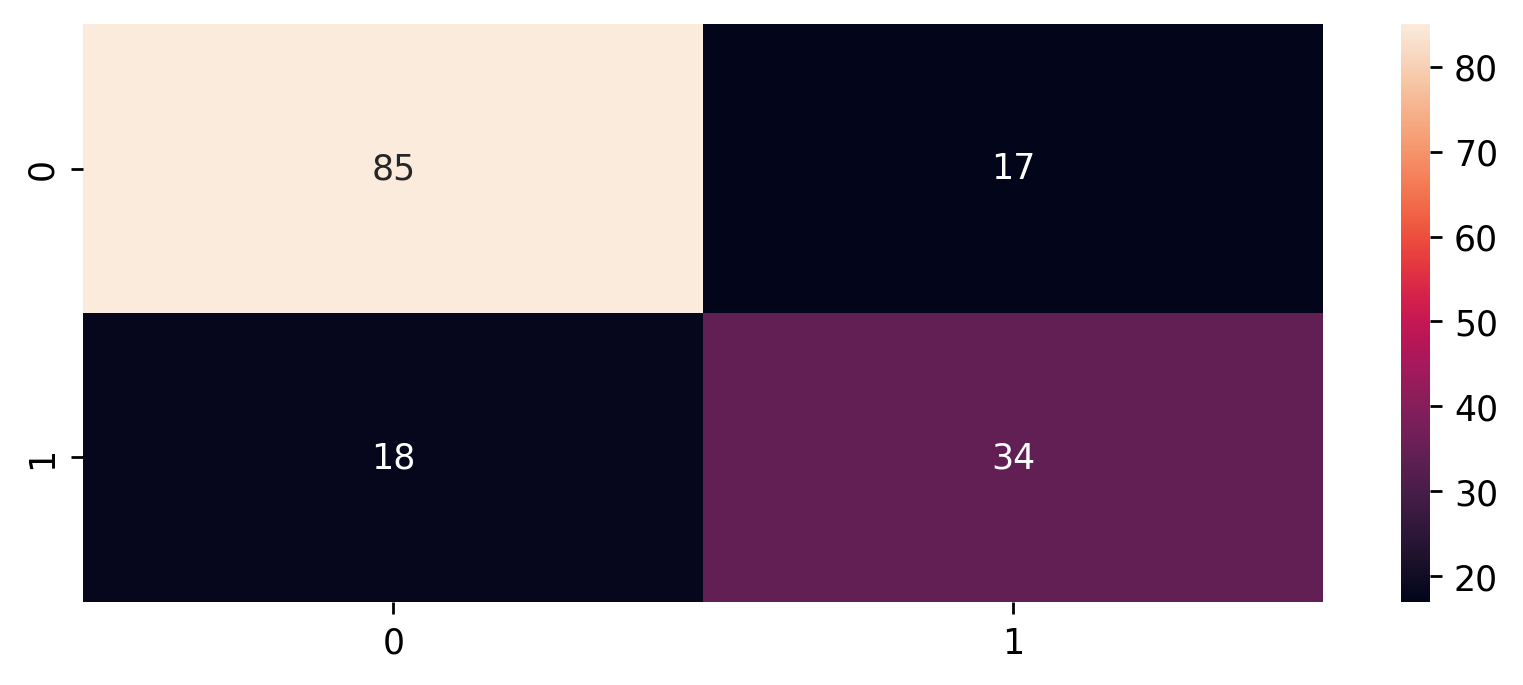

In [25]:
# Logistic Regression
lg = LogisticRegression()
prediction(lg)

Train Accuracy :  100.00%
Test Accuracy :  71.43%
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       102
           1       0.57      0.65      0.61        52

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.73      0.71      0.72       154



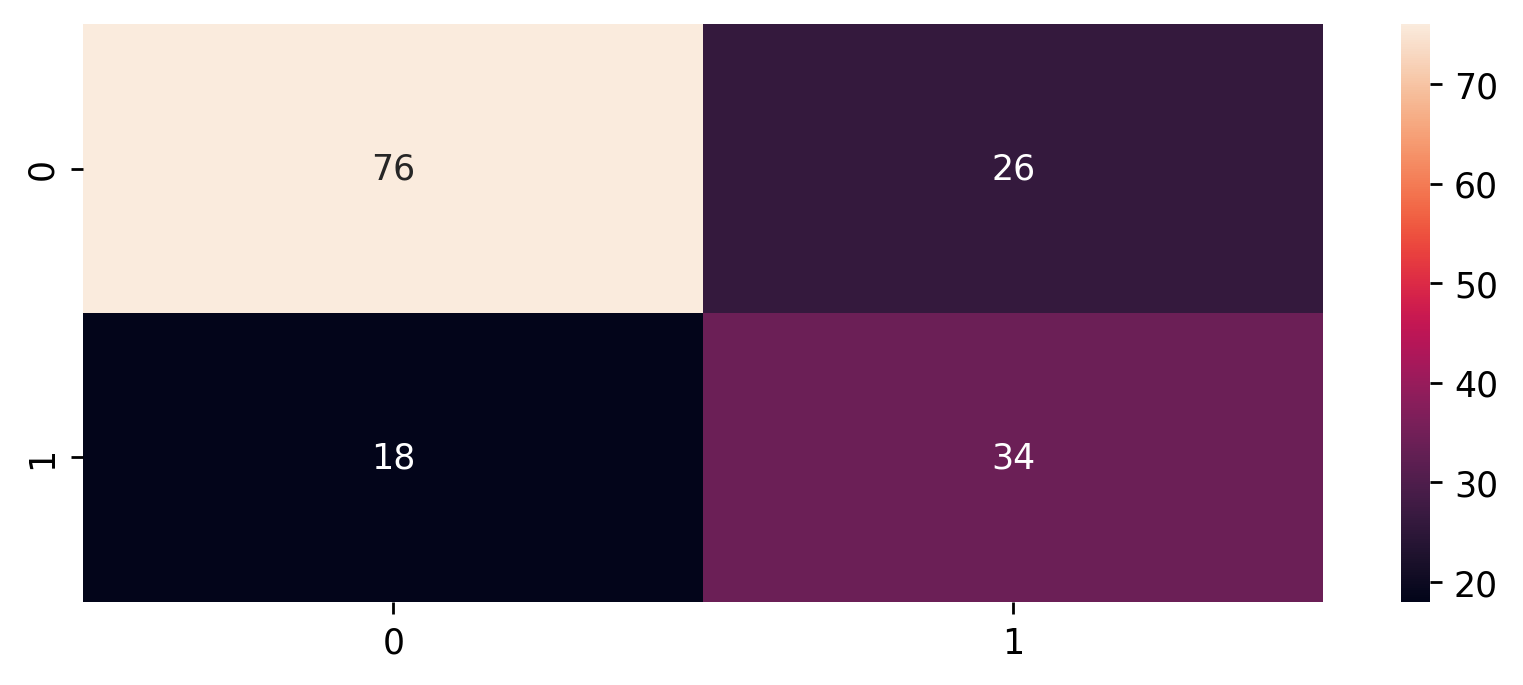

In [26]:
# Decision Tree 
prediction(DecisionTreeClassifier())

Train Accuracy :  100.00%
Test Accuracy :  77.92%
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       102
           1       0.67      0.69      0.68        52

    accuracy                           0.78       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



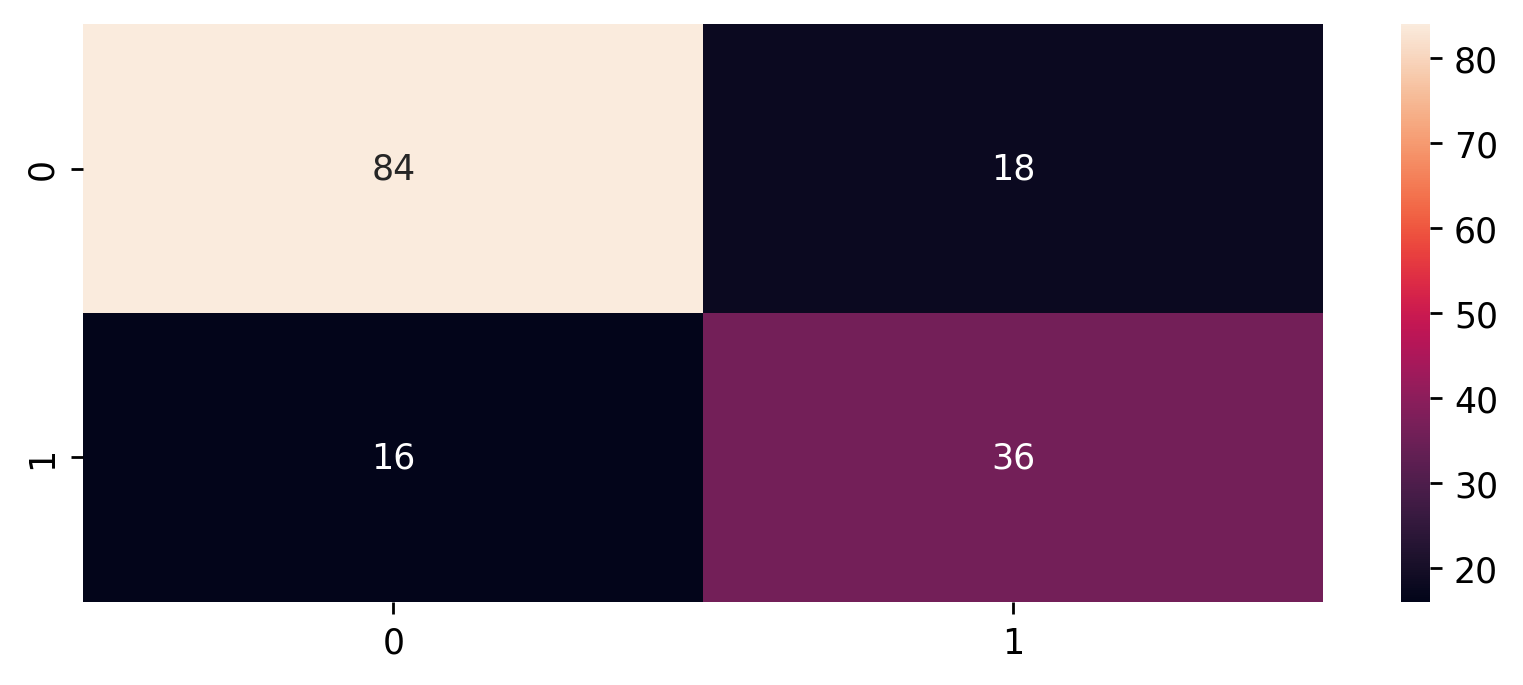

In [27]:
# Random Forest
prediction(RandomForestClassifier())

Train Accuracy :  100.00%
Test Accuracy :  70.13%
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       102
           1       0.55      0.65      0.60        52

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.70      0.71       154



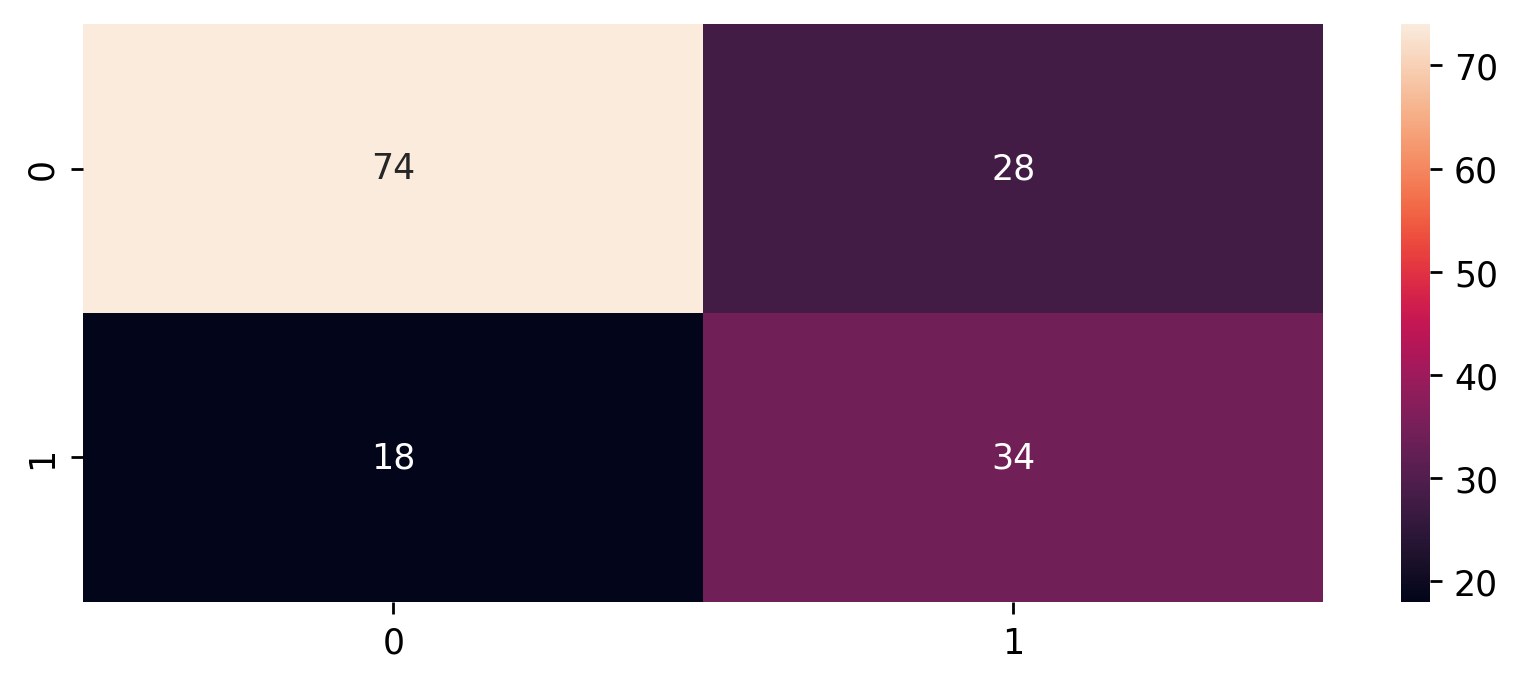

In [28]:
# Extreme Gradient Boosting
prediction(XGBClassifier())

## Hyperparameter Tuning with GridSearchCV

In [29]:
from sklearn.datasets import make_classification

In [30]:
# Generate a mock dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work with both l1 and l2 penalties
}

# Use GridSearchCV with Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model on the training set and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Evaluate the model with the best hyperparameters on the test set
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("GridSearch best parameters: ",grid_search.best_params_)
print(" ")
print("Accuracy :", accuracy)

GridSearch best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
 
Accuracy : 0.87


In [31]:
# Initialize the Logistic Regression model with the best hyperparameters
best_logreg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# Train the model on training data
best_logreg_model.fit(X_train, y_train)

# After training, we can use the model to make predictions or evaluate it on test data
y_pred = best_logreg_model.predict(X_test)
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.00%


In [32]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        93
           1       0.93      0.82      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200

